# YBI Foundation Final Project: Mileage Prediction
## Objective
To predict the digits based on the given data of hand written digits using machine learning techniques.
## Data Source
The digits dataset from sklearn.

In [3]:
# Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

## Import Data

In [4]:
df = load_digits()

## Describe Data

In [8]:
df.images.shape

1797

In [9]:
df.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [10]:
df.images[0].shape

(8, 8)

In [11]:
len(df.images)

1797

## Data Visualization

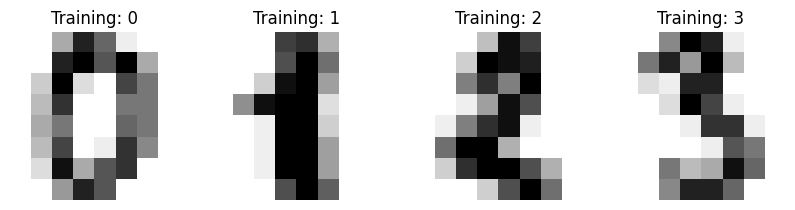

In [13]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, df.images, df.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title("Training: " + str(label))

## Data Preprocessing

In [14]:
n_samples = len(df.images)
data = df.images.reshape((n_samples, -1))

In [15]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [16]:
data[0].shape

(64,)

In [17]:
data.shape

(1797, 64)

In [18]:
data.min()

0.0

In [19]:
data.max()

16.0

In [20]:
data = data/16

In [21]:
data.min()

0.0

In [22]:
data.max()

1.0

In [23]:
data[0]

array([0.    , 0.    , 0.3125, 0.8125, 0.5625, 0.0625, 0.    , 0.    ,
       0.    , 0.    , 0.8125, 0.9375, 0.625 , 0.9375, 0.3125, 0.    ,
       0.    , 0.1875, 0.9375, 0.125 , 0.    , 0.6875, 0.5   , 0.    ,
       0.    , 0.25  , 0.75  , 0.    , 0.    , 0.5   , 0.5   , 0.    ,
       0.    , 0.3125, 0.5   , 0.    , 0.    , 0.5625, 0.5   , 0.    ,
       0.    , 0.25  , 0.6875, 0.    , 0.0625, 0.75  , 0.4375, 0.    ,
       0.    , 0.125 , 0.875 , 0.3125, 0.625 , 0.75  , 0.    , 0.    ,
       0.    , 0.    , 0.375 , 0.8125, 0.625 , 0.    , 0.    , 0.    ])

## Define Target Variable (y) and Feature Variables (X)

In [ ]:
X = data
y = df.target

## Train Test Split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1257, 64), (540, 64), (1257,), (540,))

## Modeling

In [ ]:
rf = RandomForestClassifier()

rf.fit(x_train, y_train)

RandomForestClassifier()

## Prediction

In [ ]:
y_pred = rf.predict(x_test)

y_pred

array([5, 1, 2, 4, 4, 1, 1, 3, 5, 0, 6, 0, 7, 0, 1, 7, 4, 0, 0, 7, 4, 5,
       8, 8, 1, 0, 1, 1, 9, 6, 5, 6, 9, 7, 2, 2, 9, 4, 3, 0, 0, 4, 1, 9,
       4, 4, 0, 7, 7, 9, 6, 3, 7, 0, 7, 4, 8, 2, 9, 5, 3, 9, 6, 4, 0, 4,
       5, 4, 6, 2, 2, 4, 9, 5, 6, 2, 1, 1, 9, 1, 8, 4, 7, 9, 5, 6, 0, 0,
       7, 2, 0, 4, 7, 0, 0, 0, 1, 8, 0, 7, 4, 3, 7, 6, 4, 8, 0, 6, 0, 5,
       8, 3, 2, 6, 4, 0, 5, 7, 3, 4, 2, 4, 9, 4, 9, 5, 1, 1, 1, 5, 7, 8,
       0, 7, 1, 0, 5, 5, 0, 5, 9, 5, 7, 2, 7, 7, 6, 9, 9, 2, 2, 8, 6, 0,
       2, 9, 2, 7, 3, 5, 3, 4, 8, 0, 5, 3, 2, 5, 8, 2, 6, 1, 8, 8, 0, 3,
       8, 3, 5, 9, 4, 9, 8, 2, 1, 1, 4, 2, 3, 0, 1, 9, 6, 7, 9, 5, 6, 0,
       4, 7, 2, 7, 7, 4, 2, 9, 9, 2, 6, 4, 2, 7, 8, 9, 5, 0, 8, 3, 8, 5,
       6, 2, 1, 7, 5, 7, 5, 0, 9, 1, 3, 0, 8, 6, 8, 9, 6, 3, 2, 5, 8, 5,
       1, 6, 1, 1, 3, 8, 1, 0, 9, 8, 0, 6, 8, 1, 3, 3, 4, 1, 7, 6, 4, 0,
       7, 0, 0, 6, 0, 9, 4, 6, 6, 7, 1, 3, 2, 7, 8, 1, 6, 1, 6, 2, 0, 5,
       4, 0, 6, 8, 6, 8, 7, 4, 5, 9, 6, 5, 2, 3, 6,

## Model Evaluation

In [ ]:
confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        60
           1       0.98      1.00      0.99        54
           2       0.96      1.00      0.98        55
           3       0.98      0.96      0.97        51
           4       0.98      0.97      0.97        58
           5       1.00      0.96      0.98        55
           6       1.00      0.98      0.99        46
           7       0.97      1.00      0.98        59
           8       0.96      0.94      0.95        50
           9       0.94      0.96      0.95        52

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540



##Explanation

This Python script demonstrates a complete workflow for classifying handwritten digits using the Random Forest algorithm. It begins by loading the digits dataset from sklearn, which consists of 8x8 pixel images of digits along with their corresponding labels. After visualizing a subset of the data, it reshapes each image into a flattened array and normalizes pixel values to improve model performance. The dataset is then split into training and testing sets using train_test_split. A Random Forest classifier is trained on the training data and evaluated using the testing data. Finally, it calculates and prints metrics such as the confusion matrix and classification report, which provide insights into the model's accuracy and performance. This code is useful for understanding the workflow of machine learning tasks, from data loading and preprocessing to model training and evaluation, thereby aiding in the development of skills in data manipulation, model building, and performance assessment.